### Quiz 02: due 23:59, Thursday, December 9, 2021

### -	Please work on this Jupyter notebook directly.
### -	Name a folder using your student id and quiz number (e.g., b88501045-quiz02), put this Jupyter notebook and all output files into this folder and compress this folder to a .zip file (e.g., b88501045-quiz02.zip).
### - Submit the Midterm directly through the NTU COOL course website.


### The attached csv file _Nettebach_5MIN.csv_ includes 49 years of 5-min rainfall records at Nettebach, Germany. Data with such long history is perfect for climate change study. Your task is to perform some statistical tests to confirm the impacts of climate changes onto the rainfall pattern in Nettebach. 


In [1]:
import scipy.stats as stats
import numpy as np
import random
import pandas as pd
import math
import matplotlib.pyplot as plt

In [2]:
# define filename
fn_data = "/Users/lintingxuan/Desktop/Nettebach_5MIN.csv"

# read csv file, a dataframe will be created to store data
df_rain_1d = pd.read_csv(fn_data)
df_rain_1d['datetime'] = pd.to_datetime(df_rain_1d['datetime'], format='%Y-%m-%d')
df_rain_1d

,datetime,Rain[mm]
0,1960-01-01 00:00:00,0.0
1,1960-01-01 00:05:00,0.0
2,1960-01-01 00:10:00,0.0
3,1960-01-01 00:15:00,0.0
4,1960-01-01 00:20:00,0.0
...,...,...
5154619,2008-12-31 23:35:00,0.0
5154620,2008-12-31 23:40:00,0.0
5154621,2008-12-31 23:45:00,0.0
5154622,2008-12-31 23:50:00,0.0


In [3]:
df_rain_1d_1=df_rain_1d[df_rain_1d['datetime'].dt.year<1985]
df_rain_1d_2=df_rain_1d[df_rain_1d['datetime'].dt.year>=1985]

In [4]:
rain1= df_rain_1d_1['Rain[mm]'].tolist()
sample_mean1 = np.mean(rain1)
sample_stdev1 = np.std(rain1, ddof = 1)
rain2= df_rain_1d_2['Rain[mm]'].tolist()
sample_mean2 = np.mean(rain2)
sample_stdev2 = np.std(rain2, ddof = 1)

#### 1. _Mean Test_ (50% = 10% $\times$ 5 )

#### Please perform statistical tests to check if the mean of the _annual_ rainfall in 1985-2008 is larger than that of the annual rainfall in 1960 – 1984 ($\alpha = 0.01$). 

#### The statistical tests shall be conducted under the following five different scenarios.

#### Scenario 1 (asymmetric case): $\mu_A$ is known; $\mu_B$ is not known; $\sigma_B=\sigma_A = \sigma$

1. Null Hypothesis $ H_0: \mu_A = \mu_B$
2. Alternative Hypothesis $ H_1: \mu_B> \mu_A$
3. Test statistic $Z = \frac{\bar{X}_{B}-\mu_B}{\sigma/\sqrt{n}}$
4. Distribution of test statistic $Z \sim N(0,1)$
5. Critical Region $\Re$: $Z>z_{1-\alpha}$ (e.g. $\alpha=1$\%)
6. Evaluate $Z$ under $H_0$  & if $z_0>z_{1-\alpha} \Rightarrow$ Reject $H_0$
7. $p-value$: $p(Z>z_0)$

In [5]:
n_samples1 = len(rain1)
n_samples2 = len(rain2)
f_A_mean_sample = np.mean(rain1)
mu_A = f_A_mean_sample
f_A_stdev_sample = np.std(rain1, ddof=1)
sigma = f_A_stdev_sample

f_B_mean_sample = np.mean(rain2)
mu_B = mu_A

#要加絕對值
Z = np.abs((f_B_mean_sample - mu_B)/(sigma/np.sqrt(n_samples1)))

alpha = 0.01
z_alpha = stats.norm.ppf(1-alpha)

print(f'test statistic Z = {Z:.4f}')
print(f'z_alpha = {z_alpha:.4f}')

if Z > z_alpha:
    p_value = 1-stats.norm.cdf(Z)
    print(f'We have to reject H0, and the p-value is {p_value:.4f}')
else:
    print('We have no ground to reject H0')

test statistic Z = 17.6262
z_alpha = 2.3263
We have to reject H0, and the p-value is 0.0000


#### Scenario 2 (asymmetric case): $\mu_A$ is known; $\mu_B$ is not known; $\sigma_B$ is not known

1. Null Hypothesis $ H_0: \mu_A = \mu_B$
2. Alternative Hypothesis $ H_1: \mu_B> \mu_A$
3. Test statistic $T = \frac{\bar{X}_{B}-\mu_B}{\hat{S_x}_B/\sqrt{n}}$
4. Distribution of test statistic $T \sim t(n-1)$
5. Critical Region $\Re$: $T>t_{n-1,1-\alpha}$ (e.g. $\alpha=1$\%)
6. Evaluate $T$ under $H_0$  & if $t_0>t_{n-1,1-\alpha} \Rightarrow$ Reject $H_0$
7. $p-value$: $p(T>t_0)$


In [6]:
f_A_mean_sample = np.mean(rain1)
mu_A = f_A_mean_sample

f_B_mean_sample = np.mean(rain2)
mu_B = mu_A
f_B_stdev_sample = np.std(rain2, ddof=1)

#要加絕對值
T = np.abs((f_B_mean_sample - mu_B)/(f_B_stdev_sample/np.sqrt(n_samples2)))

df = len(rain2)-1

alpha = 0.01
t_alpha = stats.t.ppf(1-alpha,df)

print(f'test statistic T = {T:.4f}')
print(f't_alpha = {t_alpha:.4f}')

if T > t_alpha:
    p_value = 1-stats.t.cdf(T,df)
    print(f'We have to reject H0, and the p-value is {p_value:.4f}')
else:
    print('We have no ground to reject H0')

test statistic T = 16.8504
t_alpha = 2.3263
We have to reject H0, and the p-value is 0.0000


#### Scenario 3 (symmetric case): $\mu_A$ is not known; $\mu_B$ is not known; $\sigma_B$ is known; $\sigma_A$ is known
1. Null Hypothesis: $ H_0: \mu_A = \mu_B$
2. Alternative Hypothesis: $ H_1: \mu_A \neq \mu_B$
3. Test statistic: $Z = \frac{(\bar{X}_A - \bar{X}_B)-(\mu_A-\mu_B)}{\sigma_{{\bar{X}_A} -{\bar{X}_B}} }$
4. Distribution of test statistic: $Z \sim N(0,1)$
5. Critical Region $\Re$: $|Z|>z_{1-\alpha}$ (e.g. $\alpha=1$\%)
6. Evaluate $Z$ under $H_0$: if $|z_0|>z_{1-\alpha} \Rightarrow$ Reject $H_0$
7. $p-value$ & $p(|Z|>z_0)$

where $\sigma_{{\bar{X}_A} -{\bar{X}_B}} = \sqrt{\frac{\sigma_A^2}{n_A} +\frac {\sigma_B^2}{n_B} }$ 

In [7]:
f_A_mean_sample = np.mean(rain1)
f_A_stdev_sample = np.std(rain1, ddof=1)
sigma_A = f_A_stdev_sample

f_B_mean_sample = np.mean(rain2)
f_B_stdev_sample = np.std(rain2, ddof=1)
sigma_B = f_B_stdev_sample

sigma_A_B = np.sqrt((sigma_A*sigma_A/n_samples1) + (sigma_B*sigma_B/n_samples2))

Z = np.abs((f_B_mean_sample - f_A_mean_sample)/sigma_A_B)

alpha = 0.01
z_alpha = stats.norm.ppf(1-alpha)

print(f'test statistic Z = {Z:.4f}')
print(f'z_alpha = {z_alpha:.4f}')

if Z > z_alpha:
    p_value = 1-stats.norm.cdf(Z)
    print(f'We have to reject H0, and the p-value is {p_value:.4f}')
else:
    print('We have no ground to reject H0')

test statistic Z = 12.1801
z_alpha = 2.3263
We have to reject H0, and the p-value is 0.0000


#### Scenario 4 (symmetric case): $\mu_A$ is not known; $\mu_B$ is not known; $\sigma_B= \sigma_A = \sigma$ is not known
1. Null Hypothesis: $ H_0: \mu_A = \mu_B$
2. Alternative Hypothesis: $ H_1: \mu_A > \mu_B$
3. Test statistic: $t = \frac{ (\bar{X}_A - \bar{X}_B)-(\mu_A-\mu_B)} {\widehat{S}_{X_A,X_B} \sqrt{\frac{1}{n_A} +\frac{1}{n_B} } } $
4. Distribution of test statistic: $T \sim t(n_A +n_B -2)$
5. Critical Region $\Re$: $T>t_{n_A+n_B-2,1-\alpha}$
6. Evaluate $T$ under $H_0$:if $t_0>t_{n_A+n_B-2,1-\alpha} \Rightarrow$ Reject $H_0$
7. $p-value$: $p(T>t_0)$

where $\widehat{S}_{X_A,X_B}^2 =  \frac{(n_A-1) \widehat{S}_{X_A}^2 +(n_B-1) \widehat{S}_{X_B}^2  }{n_A + n_B - 2}$

In [8]:
f_A_mean_sample = np.mean(rain1)
f_A_stdev_sample = np.std(rain1, ddof=1)

f_B_mean_sample = np.mean(rain2)
f_B_stdev_sample = np.std(rain2, ddof=1)

stdev_sample_A_B = np.sqrt((((n_samples1-1)*f_A_stdev_sample*f_A_stdev_sample) + ((n_samples2-1)*f_B_stdev_sample*f_B_stdev_sample))/(n_samples1+n_samples2-2))

T = np.abs((f_A_mean_sample - f_B_mean_sample))/(stdev_sample_A_B*np.sqrt(1/n_samples1+1/n_samples2))

df = n_samples2+n_samples1-2

alpha = 0.01
t_alpha = stats.t.ppf(1-alpha,df)

print(f'test statistic T = {T:.4f}')
print(f't_alpha = {t_alpha:.4f}')

p_value = 1-stats.t.cdf(T,df)

if T > t_alpha:
    
    print(f'We have to reject H0, and the p-value is {p_value:.4f}')
else:
    print(f'We have no ground to reject H0, and the p-value is {p_value:.4f}')

test statistic T = 12.1862
t_alpha = 2.3263
We have to reject H0, and the p-value is 0.0000


#### Scenario 5 (symmetric case): $\mu_A$ is not known; $\mu_B$ is not known; $\sigma_B$ is not known; $\sigma_A$ is not known
1. Null Hypothesis: $ H_0: \mu_A = \mu_B$
2. Alternative Hypothesis: $ H_1: \mu_A > \mu_B$
3. Test statistic: $R = \frac{ (\bar{X}_A - \bar{X}_B)-(\mu_A-\mu_B)} { \sqrt{\frac{\hat{S_x}_{A}^2 }{n_A} +\frac{\hat{S_x}_{B}^2}{n_B} } }  $
4. Distribution of test statistic: $R \sim t(\nu)$
5. Critical Region $\Re$: $R>t_{\nu,1-\alpha}$
6. Evaluate $R$ under $H_0$: if $r_0>t_{\nu,1-\alpha} \Rightarrow$ Reject $H_0$
7. $p-value$: $p(R>r_0)$

$\nu \approx  \left( \frac{\hat{S_x}_{A}^2 }{n_A} +\frac{\hat{S_x}_{B}^2}{n_B} \right)^2 / \left[ \frac{1}{n_A-1} \left( \frac{\hat{S_x}_{A}^2 }{n_A} \right)^2 + \frac{1}{n_B-1} \left( \frac{\hat{S_x}_{B}^2 }{n_B} \right)^2 \right]$

In [9]:
f_A_mean_sample = np.mean(rain1)
f_A_stdev_sample = np.std(rain1, ddof=1)

f_B_mean_sample = np.mean(rain2)
f_B_stdev_sample = np.std(rain2, ddof=1)

S_xA_n = f_A_stdev_sample*f_A_stdev_sample/len(rain1)
S_xB_n = f_B_stdev_sample*f_B_stdev_sample/len(rain2)

R = np.abs((f_A_mean_sample - f_B_mean_sample))/np.sqrt(S_xA_n + S_xB_n)

nu = (S_xA_n+S_xB_n)**2/(S_xA_n*S_xA_n/(n_samples1-1) + S_xB_n*S_xB_n/(n_samples2-1))

alpha = 0.01
t_alpha = stats.t.ppf(1-alpha,nu)

print(f'test statistic T = {R:.4f}')
print(f't_alpha = {t_alpha:.4f}')

p_value = 1-stats.t.cdf(R,nu)

if R > t_alpha:
    
    print(f'We have to reject H0, and the p-value is {p_value:.4f}')
else:
    print(f'We have no ground to reject H0, and the p-value is {p_value:.4f}')

test statistic T = 12.1801
t_alpha = 2.3263
We have to reject H0, and the p-value is 0.0000


#### 2. _Trend Test_ (50%) - annual rainfall

#### Please perform statistical tests to check if a trend in _annual_ rainfall over the entire 1960-2008 period can be found.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm # ACF plot
import pymannkendall as mk 

In [11]:
df_rain_1y =df_rain_1d.groupby(pd.Grouper(key="datetime",freq="1Y")).sum()
df_rain_1y=df_rain_1y.reset_index()

df_rain_1y['datetime'] = df_rain_1y['datetime'].dt.year
df_rain_1y=df_rain_1y.set_index('datetime')
df_rain_1y

,Rain[mm]
datetime,
1960,897.04
1961,904.90
1962,710.86
1963,537.08
1964,556.97
1965,1032.14
1966,1053.42
1967,826.15
1968,1008.51


##### 2.1. (5+5%) Perform linear regression over annual rainfall data, and make a plot for visual inspection. The 1-year rainfall data and the fitted line shall be plotted in a single plot. 

In [12]:
rain=df_rain_1y['Rain[mm]']
year=df_rain_1y.index
n=len(year)

b_st, a_st, r_st, p_st, se_st = stats.linregress(year,rain)
print(f'slope={b_st:.4f}, intercept={a_st:.4f}, r2={r_st**2:.4f}, p_value={p_st:.4f}, slope_std_err={se_st:.4f}')

slope=2.6137, intercept=-4366.3352, r2=0.0700, p_value=0.0662, slope_std_err=1.3899


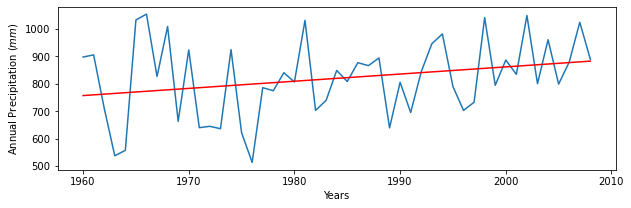

In [13]:
plt.rcParams["figure.figsize"] = (10,3)
plt.plot(year,rain)

y = year*b_st+a_st
plt.plot(year, y, color='red')

plt.xlabel('Years')
plt.ylabel('Annual Precipitation ($mm$)')

plt.show()

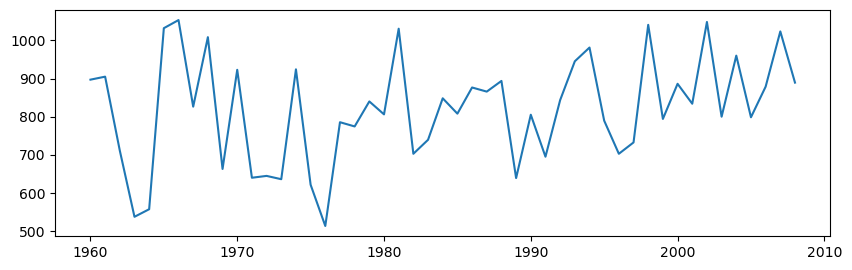

In [14]:
# A workaround to register the datetime format in pandas to matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


plt.figure(figsize=(10,3), dpi=100)

plt.plot(year, rain);

##### 2.2. (20%) Perform F-test to check if there is a trend in both one- and two-sided tests ($\alpha = 0.01$). You are required to output  $ss_{tol}$, $ss_{reg}$, $ss_{res}$ and $F$ statistics. Then, after comparing test statistics $F$ and critical region, one can know if one can reject null hypothesis $H_{0}$one can reject null hypothesis $H_{0}$

In [15]:
y_est = a_st + b_st*year

y_mean = np.mean(rain)
x_mean = np.mean(year)

cov_xy_m = np.cov(year, rain, ddof=1)
cov_xy = cov_xy_m[0][1]
var_x = cov_xy_m[0][0]
var_y = cov_xy_m[1][1]

var_err_est = (n*var_y - n*cov_xy*cov_xy/var_x)/(n-2)
ss_reg = np.sum((y_est - (a_st + b_st*x_mean))**2)
ss_res = np.sum((rain-y_est)**2)

ss_total = np.sum((rain-y_mean)**2)

print(f'Regression sum of squares, SSreg: {ss_reg:.3f}')
print(f'Residual sum of squares, SSres: {ss_res:.3f}')
print(f'Total sum of squares, SSreg: {ss_total:.3f}')

Regression sum of squares, SSreg: 66949.455
Residual sum of squares, SSres: 889790.118
Total sum of squares, SSreg: 956739.573


In [16]:
F = ss_reg / ss_res * (n-2)
print(f'Test statistics F = {F:.3f}')

Test statistics F = 3.536


In [17]:
alpha = 0.01
alpha_upper = 1 - alpha/2
alpha_lower = alpha/2
dof = n-2

f_upper = stats.f.ppf(alpha_upper,dfn = dof, dfd=dof)
f_lower = stats.f.ppf(alpha_lower,dfn = dof, dfd=dof)

print(f'For two-sided test, the critical region is [{f_lower:.3f},{f_upper:.3f}]')


f_upper = stats.f.ppf(1-alpha,dfn = dof, dfd=dof)
print(f'For one-sided test, the upper bound of the critical region is {f_upper:.3f}')

For two-sided test, the critical region is [0.466,2.148]
For one-sided test, the upper bound of the critical region is 1.991


As we can see, for both two-sided or one-sided test, the Test statistics ($F$) is outside of the ciritcal region. Therefore, we can reject the null hypothesis ($H_{0}: b=0$)

In [18]:
p_value = 1 - stats.f.cdf(F, dfn=dof, dfd=dof)
print (f'p_value = {p_value:.3f}')

p_value = 0.000


#### As we know, F-test may not be the most suitable method to perfrom trend test for time series since 'time' is not normally distributed.  Alternatively, we may try to do _non-parametric Mann-Kendall test_. 

##### 2.3. (10%) Please check if there is seasonality and autocorrelation in the annual rainfall time series using ACF plot.

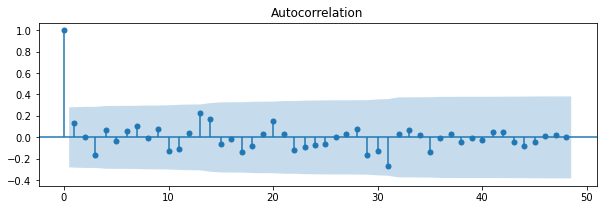

In [19]:
fig, ax = plt.subplots(figsize=(10, 3))
sm.graphics.tsa.plot_acf(rain, lags=48, ax=ax);

From the ACF plot, some very minor autocorrelation can be seen at the first lag. Because it is really minor, we may ignore it and thus assume that there is no autocorrelation. 

In the original time series plot, we don't see clear regular or repetitive patterns. 

In the ACF plot, when there is a strong seasonality, the ACF plot usually reveals definitive repeated spikes at the multiples of the seasonal window. Here, we only see really minor repeated spikes (the period is around 1 week, or 7 days), and we may ignore it. So, we assume that there is no seasonality. 

So, we can simply the Original Mann Kendall test, which doesn't consider auto-correlation or seasonality.

##### 2.4. (10%) Based upon the above checks, apply a suitable version of the _non-parametric Mann-Kendall test_ to performing time series trend test ($\alpha = 0.01$) and print the result.

In [20]:
result = mk.original_test(rain)
print(result)

Mann_Kendall_Test(trend='no trend', h=False, p=0.08316911041430197, z=1.73258694994859, Tau=0.1717687074829932, s=202.0, var_s=13458.666666666666, slope=3.0229772727289284, intercept=753.5985454544652)


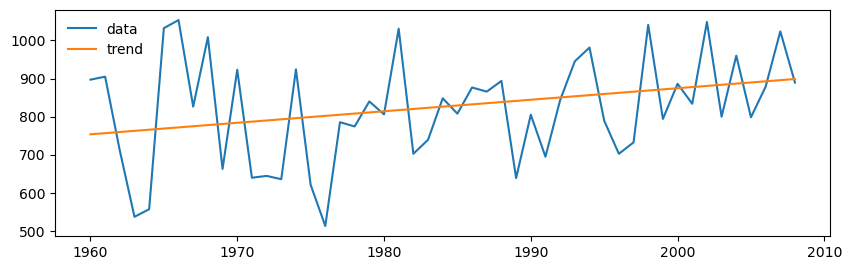

In [21]:

plt.figure(figsize=(10,3), dpi=100)

trend_tfb_d = np.arange(len(rain)) * result.slope + result.intercept

plt.plot(year, rain, label = 'data')
plt.plot(year, trend_tfb_d, label = 'trend')

plt.legend(frameon = False);